# stats
## scoring
different scoring functions on the clean/dirty datsets using ```scores.py```
more weights in ```~/anaconda3/envs/bm3/lib/python3.6/site-packages/pyrosetta/database/scoring/weights```

```score<0-5>``` failed with fatal VDW errors - centroid?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

clean = pd.read_csv('BM3-rosetta-scores-clean.csv', index_col=0)
raw = pd.read_csv('BM3-rosetta-scores-raw.csv', index_col=0)
raw.head()

,full atom,ref2015,docking
4dtw.pdb,-531.018164,-531.018164,-1139.651019
3psx.pdb,-20.914337,-20.914337,-1007.107623
4duf.pdb,-1617.525176,-1617.525176,-2335.400972
4dql.pdb,697.353790,697.353790,-800.432518
3qi8.pdb,4649.071191,4649.071191,-740.774349


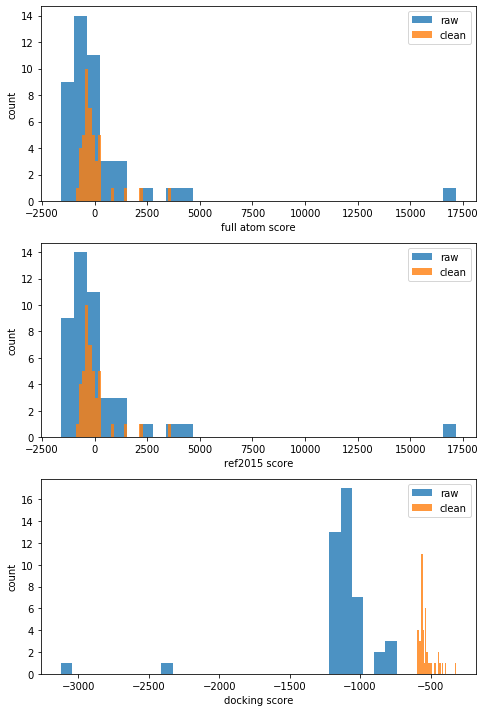

In [2]:
fig, axes = plt.subplots(3,1, figsize = (7,10))


for ax, j in zip(axes.flatten(), zip(clean.columns, raw.columns)):
    ax.hist(raw[j[1]], alpha = 0.8, bins = 30)
    ax.hist(clean[j[0]], alpha = 0.8, bins = 30)
    ax.legend(['raw','clean'])
    ax.set_ylabel('count')
    ax.set_xlabel(j[0] + ' score')
    #ax.set_title(j[0])
plt.tight_layout()
plt.show()

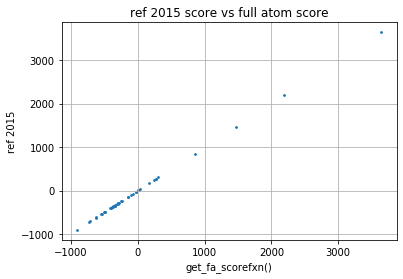

In [8]:
plt.scatter(clean['full atom'], clean['ref2015'], s = 3)
plt.title('ref 2015 score vs full atom score')
plt.xlabel('get_fa_scorefxn()')
plt.ylabel('ref 2015')
plt.grid()
plt.show()

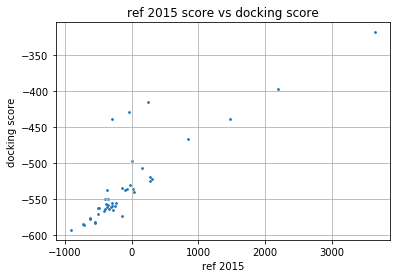

In [11]:
plt.scatter(clean['ref2015'], clean['docking'], s = 3)
plt.title('ref 2015 score vs docking score')
plt.ylabel('docking score')
plt.xlabel('ref 2015')
plt.grid()
plt.show()

## Outliers in ```clean```
Full atom score and ref2015 have positve outliers

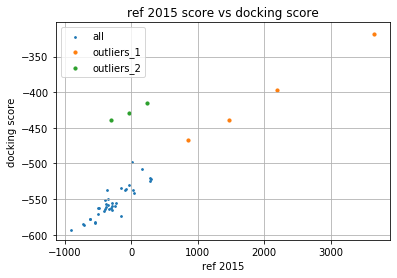

In [26]:
outliers_1 = clean.loc[clean['full atom'].nlargest(4).index, :]
outliers_2 = clean.loc[clean.drop(outliers_1.index)['docking'].nlargest(3).index,:]

plt.scatter(clean['ref2015'], clean['docking'], s = 3)
plt.scatter(outliers_1['ref2015'], outliers_1['docking'], s = 10)
plt.scatter(outliers_2['ref2015'], outliers_2['docking'], s = 10)
plt.title('ref 2015 score vs docking score')
plt.ylabel('docking score')
plt.xlabel('ref 2015')
plt.legend(['all','outliers_1','outliers_2'])
plt.grid()
plt.show()

In [27]:
outliers_1.head()

,full atom,ref2015,docking
1smj,3645.513367,3645.513367,-318.147717
3qi8,2195.462742,2195.462742,-397.563856
3ekb,1467.614650,1467.614650,-439.429588
3cbd,851.891685,851.891685,-467.365505


In [28]:
outliers_2.head()

,full atom,ref2015,docking
3ekd,239.289709,239.289709,-414.949136
4dqk,-32.911723,-32.911723,-429.230142
4dql,-299.931890,-299.931890,-438.777832
